\begin{equation}
M_X(t) = \mathbb{E}\!\left[e^{tX}\right] = \int\limits_{-\infty}^\infty e^{t x} \,\mathrm{d}F(x) = +\infty \quad \forall t>0
\label{eqn:heavytaildef}
\end{equation}

\begin{equation}
\lim_{x \to \infty} e^{\lambda x}\overline{F}(x) = +\infty \quad \forall \lambda>0
\label{eqn:heavytaillim}
\end{equation}

\begin{equation}
\lim_{x \to \infty} \Pr[X>x+t\mid X>x] = 1 \quad \forall t>0
\label{eqn:longtaildef}
\end{equation}

\begin{equation}
\lim_{x \to \infty} \frac{\overline{F}(x+t)}{\overline{F}(x)} = 1 \quad \forall t>0
\label{eqn:longtaildeflim}
\end{equation}

In [1]:
import numpy as np
from scipy import stats, optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
Norm = stats.norm(0, 1)

In [3]:
Exp = stats.expon()

In [4]:
LogNorm = stats.lognorm(0.1, loc=-10, scale=10)

In [5]:
xlin = np.linspace(-10, 10, 1000)

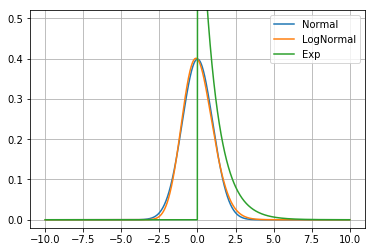

In [17]:
fig, axe = plt.subplots()
axe.plot(xlin, Norm.pdf(xlin), label="Normal")
axe.plot(xlin, LogNorm.pdf(xlin), label="LogNormal")
axe.plot(xlin, Exp.pdf(xlin), label="Exp")
axe.set_ylim([-0.02, 0.52])
axe.legend()
axe.grid()

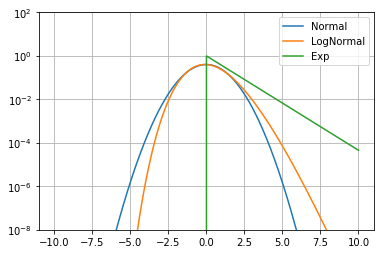

In [21]:
fig, axe = plt.subplots()
axe.semilogy(xlin, Norm.pdf(xlin), label="Normal")
axe.plot(xlin, LogNorm.pdf(xlin), label="LogNormal")
axe.plot(xlin, Exp.pdf(xlin), label="Exp")
axe.set_ylim([1e-8, 1e2])
axe.legend()
axe.grid(which='both')

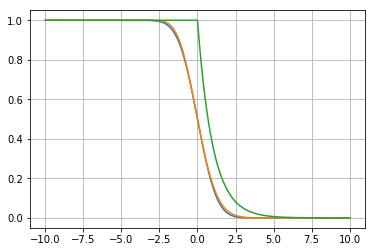

In [23]:
fig, axe = plt.subplots()
axe.plot(xlin, 1-Norm.cdf(xlin), label="Normal")
axe.plot(xlin, 1-LogNorm.cdf(xlin), label="LogNormal")
axe.plot(xlin, 1-Exp.cdf(xlin), label="Exp")
axe.grid()

In [9]:
def expmoment(cdist):
    def inner(x):
        return x[:,0]*x[:,1] + np.log(1 - cdist.cdf(x[:,0]))
    return inner

In [10]:
def survratio(cdist):
    def inner(x):
        return (1 - cdist.cdf(x[:,0]+x[:,1]))/(1 - cdist.cdf(x[:,0]))
    return inner

In [11]:
x = np.linspace(-10, 100, 100)
y = np.linspace(-10, 100, 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T

In [12]:
Z1 = expmoment(Norm)(XX).reshape(X.shape)
SR1 = survratio(Norm)(XX).reshape(X.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
Z2 = expmoment(LogNorm)(XX).reshape(X.shape)
SR2 = survratio(LogNorm)(XX).reshape(X.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


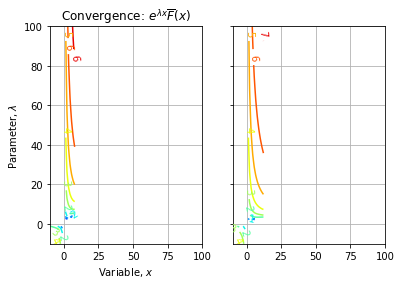

In [14]:
fig, axe = plt.subplots(1, 2, sharex=True, sharey=True)
CS = axe[0].contour(X, Y, np.log(Z1), 10, cmap=cm.jet)
axe[0].clabel(CS, inline=1, fontsize=10, fmt="%.0f")
CS = axe[1].contour(X, Y, np.log(Z2), 10, cmap=cm.jet)
axe[1].clabel(CS, inline=1, fontsize=10, fmt="%.0f")
axe[0].set_title(r"Convergence: $e^{\lambda x}\overline{F}(x)$")
axe[0].set_xlabel(r"Variable, $x$")
axe[0].set_ylabel(r"Parameter, $\lambda$")
for i in range(2):
    axe[i].grid()
fig.savefig("MLE_NLL_2D.png", dpi=120)